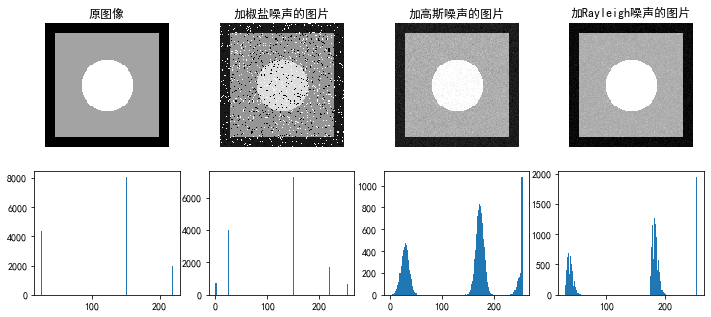

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import random
import math
%matplotlib inline
%config InlinBackend.figure_format="retina"
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负

#给图像添加椒盐噪声
def addSaltAndPepper(src, percentage):
    #NoiseImg = src         #使用此语句传递的是地址，程序会出错
    NoiseImg = src.copy()   #在此要使用copy函数，否则src和主程序中的img都会跟着改变
    NoiseNum = int(percentage * src.shape[0] * src.shape[1])
    for i in range(NoiseNum):
        randX = random.randint(0, src.shape[0] - 1)  #产生[0, src.shape[0] - 1]之间随机整数
        randY = random.randint(0, src.shape[1] - 1)
        if random.randint(0, 1) == 0:  
            NoiseImg[randX, randY] = 0
        else:
            NoiseImg[randX, randY] = 255
    return NoiseImg
# 添加高斯噪声
def addGaussianNoise(src,mu,sigma):
    NoiseImg=src.copy()
    NoiseImg=NoiseImg/NoiseImg.max()
    rows=NoiseImg.shape[0]
    cols=NoiseImg.shape[1]
    for i in range(rows):
        for j in range(cols):
            NoiseImg[i,j]=NoiseImg[i,j]+random.gauss(mu,sigma) 
#             NoiseImg[i,j]=NoiseImg[i,j]+np.random.normal(mu,sigma) 
            if  NoiseImg[i,j]< 0:
                 NoiseImg[i,j]=0
            elif  NoiseImg[i,j]>1:
                 NoiseImg[i,j]=1
    NoiseImg=np.uint8(NoiseImg*255)
    return NoiseImg
# 添加Rayleigh噪声
def addRayleighNoise(src,scale):
    NoiseImg=src.copy()
    NoiseImg=NoiseImg/NoiseImg.max()
    rows=NoiseImg.shape[0]
    cols=NoiseImg.shape[1]
    for i in range(rows):
        for j in range(cols):
            #python里使用random.gauss函数加高斯噪声
#             NoiseImg[i,j]=NoiseImg[i,j]+random.gauss(mu,sigma) 
            NoiseImg[i,j]=NoiseImg[i,j]+np.random.rayleigh(scale) 
            if  NoiseImg[i,j]< 0: 
                 NoiseImg[i,j]=0
            elif  NoiseImg[i,j]>1:
                 NoiseImg[i,j]=1
    NoiseImg=np.uint8(NoiseImg*255)
    return NoiseImg

# 创建图像
def create_box():
    box=np.zeros((120,120),np.uint8)+25
    box1 = np.ones((100, 100), np.uint8)*150
    box[10:110,10:110]=box1
    shape = box.shape
    center=(60,60)
    for i in range(shape[0]):
        for j in range(shape[1]):
            De=math.sqrt((i-center[0])**2+(j-center[1])**2)
            if De<25:
                box[i,j]=220
    return box


if __name__ == '__main__':
    img0 = create_box()
    img1=img0.copy()
    plt.figure(figsize=(12,5))
    plt.subplot(241)
    plt.axis("off")
    plt.imshow(img1,cmap='gray')
    plt.title('原图像')
    plt.subplot(245)
    img1=img1.reshape(-1,1)
    count1,bins1,_=plt.hist(img1,bins=128)
    
    img_SP = addSaltAndPepper(img0, 0.1)   #给图像添加椒盐噪声
    plt.subplot(242)
    plt.axis("off")
    plt.imshow(img_SP,cmap='gray')
    plt.title('加椒盐噪声的图片')
    plt.subplot(246)
    img_SP=img_SP.reshape(-1,1)
    countSP,binsSP,_=plt.hist(img_SP,bins=128)    

    img_G = addGaussianNoise(img0,0,0.03)#给图像添加高斯噪声
    plt.subplot(243)
    plt.axis("off")
    plt.imshow(img_G,cmap='gray')
    plt.title('加高斯噪声的图片')
    plt.subplot(247)
    img_G=img_G.reshape(-1,1)
    countG,binsG,_=plt.hist(img_G,bins=128) 

    
    img_R = addRayleighNoise(img0,0.03)#给图像添加Rayleigh噪声
    plt.subplot(244)
    plt.axis("off")
    plt.imshow(img_R,cmap='gray')
    plt.title('加Rayleigh噪声的图片')
    plt.subplot(248)
    img_R=img_R.reshape(-1,1)
    countR,binsR,_=plt.hist(img_R,bins=128)
    plt.show()

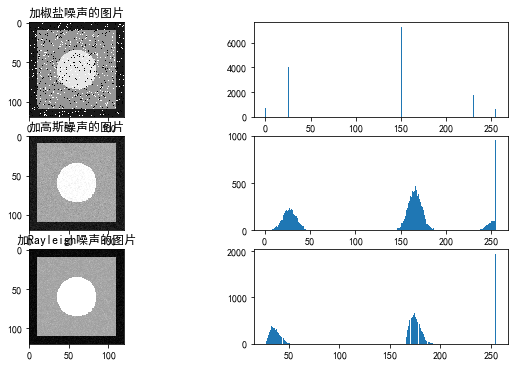

In [4]:
    img_SP = addSaltAndPepper(img0, 0.1)   #给图像添加椒盐噪声
    plt.figure(figsize=(10,8))
    plt.subplot(421)
    plt.imshow(img_SP,cmap='gray')
    plt.title('加椒盐噪声的图片')
    plt.subplot(422)
    img_SP=img_SP.reshape(-1,1)
    countSP,binsSP,_=plt.hist(img_SP,bins=255)    

    img_G = addGaussianNoise(img0,0,0.03)#给图像添加高斯噪声
    plt.subplot(423)
    plt.imshow(img_G,cmap='gray')
    plt.title('加高斯噪声的图片')
    plt.subplot(424)
    img_G=img_G.reshape(-1,1)
    countG,binsG,_=plt.hist(img_G,bins=255) 

    
    img_R = addRayleighNoise(img0,0.03)#给图像添加Rayleigh噪声
    plt.subplot(425)
    plt.imshow(img_R,cmap='gray')
    plt.title('加Rayleigh噪声的图片')
    plt.subplot(426)
    img_R=img_R.reshape(-1,1)
    countR,binsR,_=plt.hist(img_R,bins=255)





C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  if __name__ == '__main__':


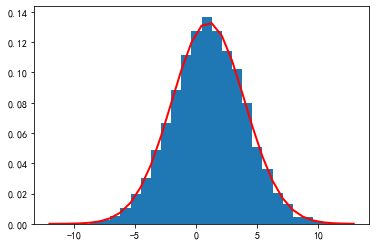

In [2]:
import numpy as np
import matplotlib.pyplot as plt

mu = 1  #期望为1
sigma = 3  #标准差为3
num = 10000  #个数为10000

rand_data = np.random.normal(mu, sigma, num)
count, bins, ignored = plt.hist(rand_data, 30, normed=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *np.exp( - (bins - mu)**2 / (2 * sigma**2)), linewidth=2, color='r')
plt.show()
# print(bins)

In [26]:
np.random.rayleigh(0.5)

1.1623280669895149

In [3]:
help(np.random.gamma)

Help on built-in function gamma:

gamma(...) method of numpy.random.mtrand.RandomState instance
    gamma(shape, scale=1.0, size=None)
    
    Draw samples from a Gamma distribution.
    
    Samples are drawn from a Gamma distribution with specified parameters,
    `shape` (sometimes designated "k") and `scale` (sometimes designated
    "theta"), where both parameters are > 0.
    
    .. note::
        New code should use the ``gamma`` method of a ``default_rng()``
        instance instead; please see the :ref:`random-quick-start`.
    
    Parameters
    ----------
    shape : float or array_like of floats
        The shape of the gamma distribution. Must be non-negative.
    scale : float or array_like of floats, optional
        The scale of the gamma distribution. Must be non-negative.
        Default is equal to 1.
    size : int or tuple of ints, optional
        Output shape.  If the given shape is, e.g., ``(m, n, k)``, then
        ``m * n * k`` samples are drawn.  If size i

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


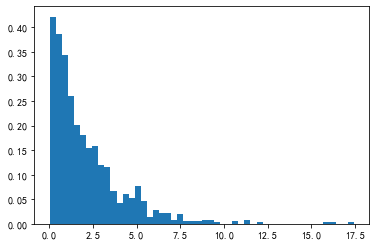

In [8]:
shape,scale=1.,2.
s=np.random.gamma(shape,scale,1000)
count, bins, ignored = plt.hist(s, 50, normed=True)#50：是50个条形图

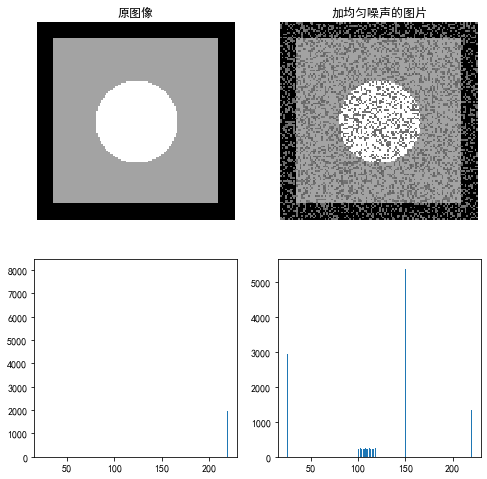

In [13]:
import cv2
import matplotlib.pyplot as plt
import random
import numpy as np
%matplotlib inline
%config InlinBackend.figure_format="retina"
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负

def add_mean_noise(img, a=100, b=150, percentage=0.5):
    '''添加均匀分布噪声'''
    NoiseImg = img.copy()
    NoiseNum = int(percentage * img.shape[0] * img.shape[1])
    for i in range(NoiseNum):
        randX = random.randint(0, img.shape[0] - 1)
        randY = random.randint(0, img.shape[1] - 1)
        NoiseImg[randX, randY] = np.random.randint(a, b)
    return NoiseImg
def create_box():
    box=np.zeros((120,120),np.uint8)+25
    box1 = np.ones((100, 100), np.uint8)*150
    box[10:110,10:110]=box1
    shape = box.shape
    center=(60,60)
    for i in range(shape[0]):
        for j in range(shape[1]):
            De=math.sqrt((i-center[0])**2+(j-center[1])**2)
            if De<25:
                box[i,j]=220
    return box

if __name__ == '__main__':
    img0 = create_box()
    img1=img0.copy()
    plt.figure(figsize=(8,8))
    plt.subplot(221)
    plt.axis("off")
    plt.imshow(img1,cmap='gray')
    plt.title('原图像')
    plt.subplot(223)
    img1=img1.reshape(-1,1)
    count1,bins1,_=plt.hist(img1,bins=256)    
    img_mean = add_mean_noise(img0,100,120,0.4)   #给图像添加均匀噪声
    plt.subplot(222)
    plt.axis("off")
    plt.imshow(img_mean,cmap='gray')
    plt.title('加均匀噪声的图片')
    plt.subplot(224)
    img_mean=img_mean.reshape(-1,1)
    count1,bins1,_=plt.hist(img_mean,bins=256)